In [3]:
# Define a function to open tokens
def open_tokens(files_path):
    
    # Import first
    import os
    from nltk.tokenize import word_tokenize
    import resource
    
    # Increase file reading limit to 10,000
    resource.setrlimit(resource.RLIMIT_NOFILE, (10000, 9223372036854775807))
    
    # Define global objects
    global raw
    global tokenized
    global no_stops
    
    # Get docs names
    txt_names = os.listdir(files_path)
    
    # Define file path
    direc = files_path + "/{}"
    
    # Open the files into a list
    doc_list = [open(direc.format(doc), encoding="utf8", errors='ignore') for doc in txt_names]
    
    # Read the files into a list of raw documents
    raw = [doc.read() for doc in doc_list]
    
    # List of tokenized documents
    tokenized = [word_tokenize(doc.lower()) for doc in raw]
    
    # Retain alphabetic words: alpha_only
    alpha_only = [[t for t in doc if t.isalpha()] for doc in tokenized]
    
    # Remove stopwords 
    no_stops = [[t for t in doc if t not in english_stops] for doc in alpha_only]
    
    # Return the three lists
    return (raw, tokenized, no_stops)

In [105]:
english_stops.append('373')

In [4]:
# Read english_stops
import json
with open('english_stops', 'r') as f:
    english_stops = json.loads(f.read())

In [5]:
# Define files paths
conf = "/Users/Mohamad/chatbot-env/labels binary/Conf"
info = "/Users/Mohamad/chatbot-env/labels binary/info"

# Extract the documents/tokens with open_tokens() function
raw_conf, tokenized_conf, no_stops_conf = open_tokens(conf)
raw_info, tokenized_info, no_stops_info = open_tokens(info)

In [ ]:
print(raw_conf[33])

In [ ]:
print(no_stops_conf[33])

In [ ]:
print(raw_info[330])

In [ ]:
print(no_stops_info[330])

In [7]:
print(len(raw_conf)/2125)
print(len(raw_info)/2125)

0.08423529411764706
0.9157647058823529


In [37]:
# Compute the length of each document
length_conf = [len(doc) for doc in no_stops_conf]
length_info = [len(doc) for doc in no_stops_info]

In [31]:
# Plot Config
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 8, 8
plt.style.use('seaborn-white')

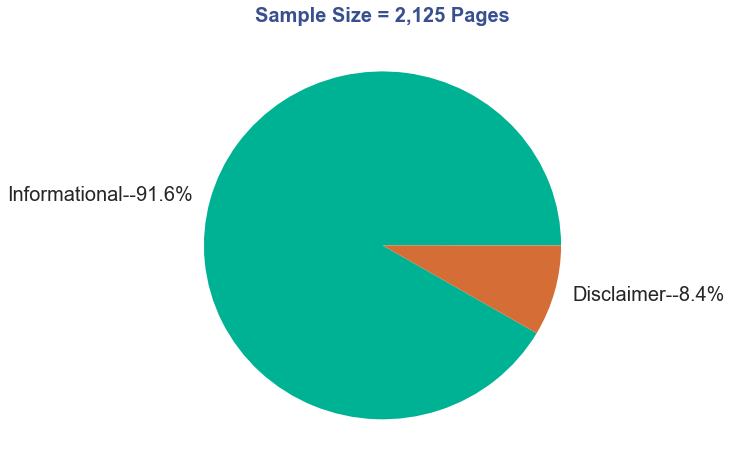

In [35]:
# Add the percentages
list_ = [0.9157, 0.0842]

# Add the labels
names_ = ["Informational--91.6%", "Disclaimer--8.4%"]

# Plot a pie chart
plt.pie(list_, labels=names_, colors=['#00B294','#D56D36'])
plt.title("Sample Size = 2,125 Pages", fontsize=20, fontweight='bold', color='#39508F')
plt.rc('xtick', labelsize=20, color='#323280')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

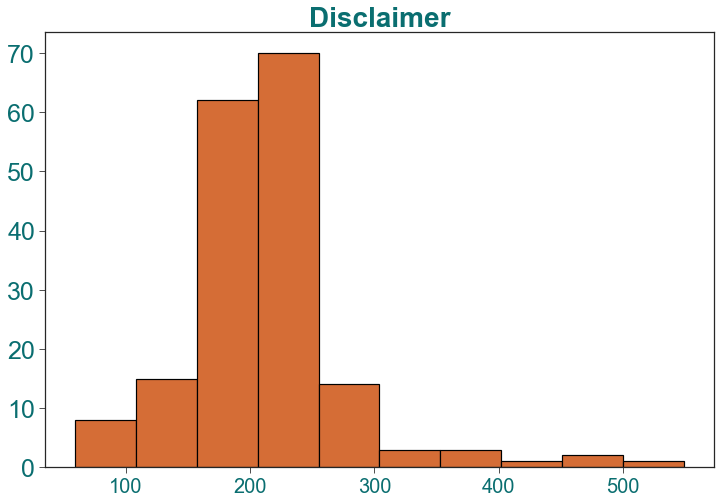

In [38]:
# Config size
rcParams['figure.figsize'] = 12, 8

# Config plot style
plt.style.use('seaborn-ticks')

# Plot a histogram
plt.hist(length_conf,  edgecolor='black', linewidth=1.2, color='#D56D36')
plt.rc('xtick', labelsize=20)
plt.title("Disclaimer", fontsize=28, fontweight='bold', color="#0A6E70")
plt.tick_params(labelcolor='#0A6E70')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

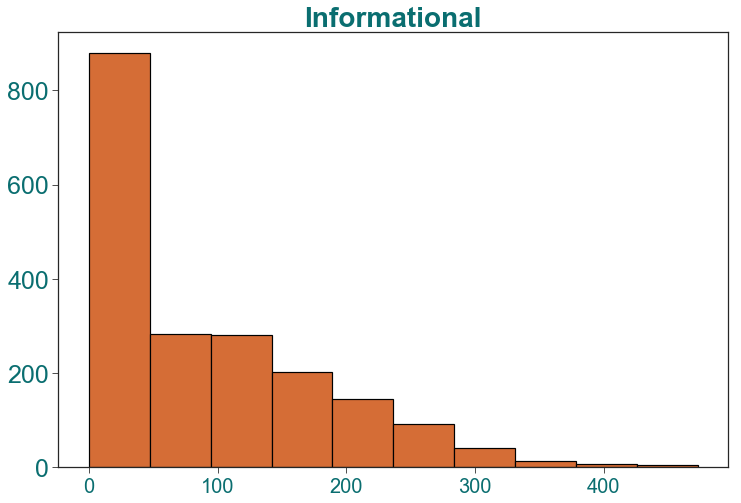

In [39]:
# Config size
rcParams['figure.figsize'] = 12, 8

# Config plot style
plt.style.use('seaborn-ticks')

# Plot a histogram
plt.hist(length_info,  edgecolor='black', linewidth=1.2, color='#D56D36')
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title("Informational", fontsize=28, fontweight='bold', color="#0A6E70")
plt.tick_params(labelcolor='#0A6E70')
plt.show

In [23]:
# Define a function to get bow frequencies 
def bow_freq(dataset,my_stop_words, maxdf=0.6, ngram = (1,2), max_features=10000):
    
    # Import first
    from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

    # Instantiate vec
    vec = CountVectorizer(max_features=max_features, # Fix the max number of features
                       max_df=maxdf, 
                       stop_words=my_stop_words,
                           ngram_range=ngram)
    
    #create bow
    bow = vec.fit_transform(dataset)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq

In [24]:
# Define a function to get tfidf score frequencies 
def tfidf_freq(dataset,my_stop_words, ngram = (1,2), maxdf=0.6, max_features=10000):
    
     # Import first
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    # Instantiate vec
    vec = TfidfVectorizer(max_features=max_features, # Fix the max number of features
                       max_df=maxdf, 
                       stop_words=my_stop_words,
                           ngram_range=ngram)
    
    #create tfidf
    tfidf = vec.fit_transform(dataset)
    sum_words = tfidf.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    
    return words_freq

In [25]:
# Import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Modify English stop words list alittle
my_stop_words = ENGLISH_STOP_WORDS.union(['marcus', 'millichap', 
                                              'san', 'diego', "ca", 
                                              "information", 'tilocblob','000','10','com'])
    
# Extract monogram/bigram bow frequencies
words_freq_conf = bow_freq(raw_conf, my_stop_words = my_stop_words, maxdf = 0.9)
words_freq_info = bow_freq(raw_info, my_stop_words = my_stop_words, maxdf = 0.9)

tfidf_score_conf = tfidf_freq(raw_conf, my_stop_words = my_stop_words, maxdf = 0.9)
tfidf_score_info = tfidf_freq(raw_info, my_stop_words = my_stop_words, maxdf = 0.9)

In [20]:
# Define a function to extract lists of words and counts/scores
def wds_cnts(freq, count):
    word_ = []
    count_ = []
    for i in range(count):
        word_.append(freq[:count][i][0])
        count_.append(freq[:count][i][1])
    
    return word_, count_

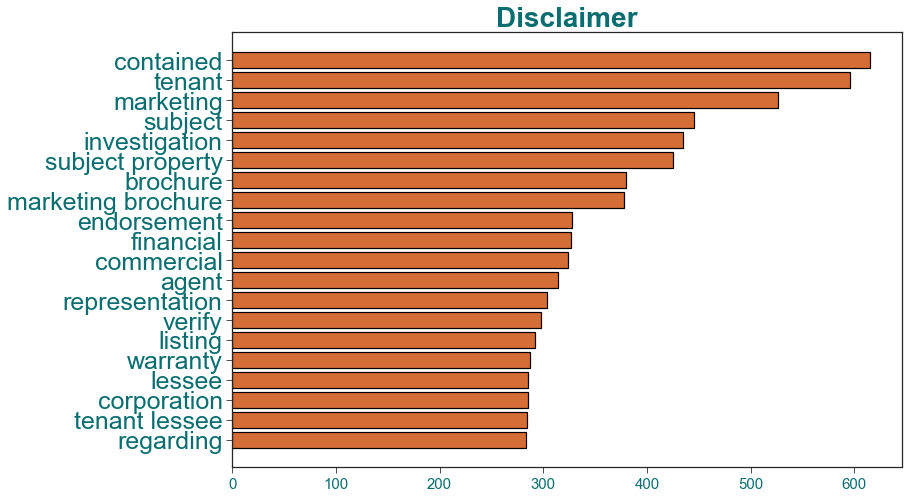

In [42]:
# Extract lists of words and counts for plotting
bow_conf_word, bow_conf_count = wds_cnts(freq=words_freq_conf, count=20)

# Plot a bar chart
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(bow_conf_word, bow_conf_count, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#D56D36')
plt.title("Disclaimer", fontsize=28, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=20, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

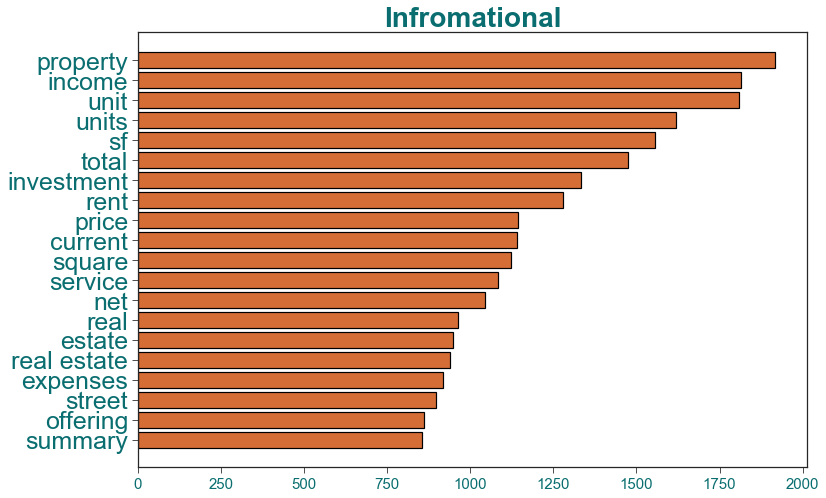

In [41]:
# Extract lists of words and counts for plotting
bow_info_word, bow_info_count = wds_cnts(freq=words_freq_info, count=20)
    
# Plot a bar chart
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(bow_info_word, bow_info_count, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#D56D36')
plt.title("Infromational", fontsize=28, fontweight='bold', color="#0A6E70")

plt.rc('ytick', labelsize=25, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

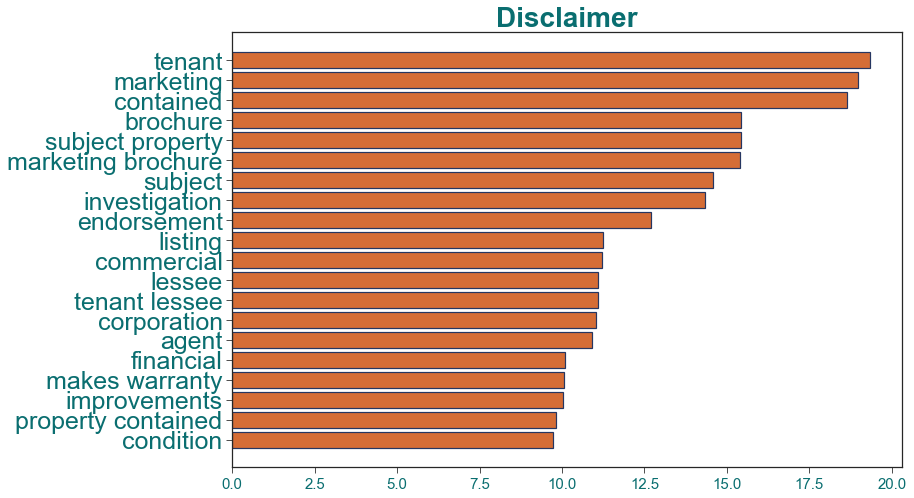

In [44]:
# Extract lists of words and scores for plotting
tfidf_conf_word, tfidf_conf_score = wds_cnts(freq=tfidf_score_conf, count=20)

# plot a bar chart    
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(tfidf_conf_word, tfidf_conf_score, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='#263661', color='#D56D36')
plt.title("Disclaimer", fontsize=28, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=20, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

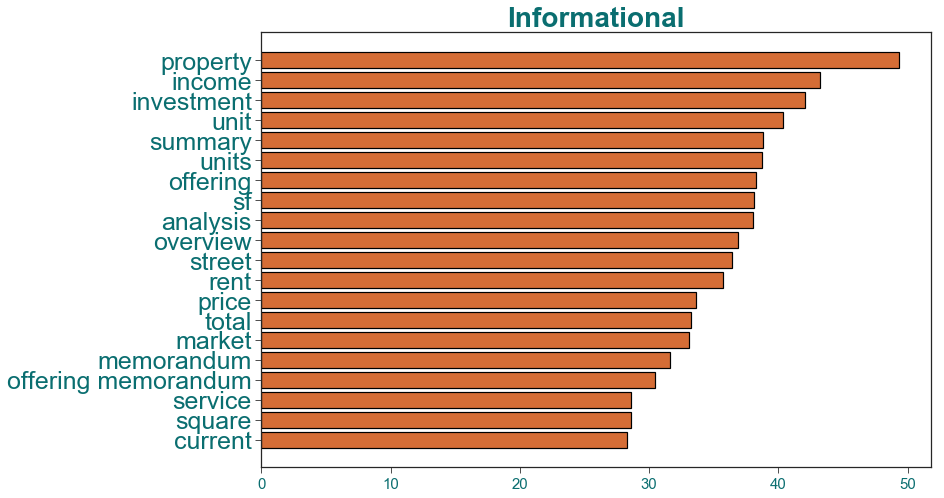

In [46]:
# Extract lists of words and scores for plotting
tfidf_info_word, tfidf_info_score = wds_cnts(freq=tfidf_score_info, count=20)

# Plot a bar chart    
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(tfidf_info_word, tfidf_info_score, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#D56D36')
plt.title("Informational", fontsize=28, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=20, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

In [50]:
# Import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Modify English stop words list alittle
my_stop_words = ENGLISH_STOP_WORDS.union(['marcus', 'aabb', 'millichap', 
                                              'san', 'diego', "ca", 
                                              "information", 'tilocblob','000','10','com'])
    
# Bigram bow frequencies
words_freq_conf = bow_freq(raw_conf, my_stop_words = my_stop_words, maxdf = 0.9, ngram = (2,2))
words_freq_info = bow_freq(raw_info, my_stop_words = my_stop_words, maxdf = 0.9, ngram = (2,2))

tfidf_score_conf = tfidf_freq(raw_conf, my_stop_words = my_stop_words, maxdf = 0.9, ngram = (2,2))
tfidf_score_info = tfidf_freq(raw_info, my_stop_words = my_stop_words, maxdf = 0.9, ngram = (2,2))

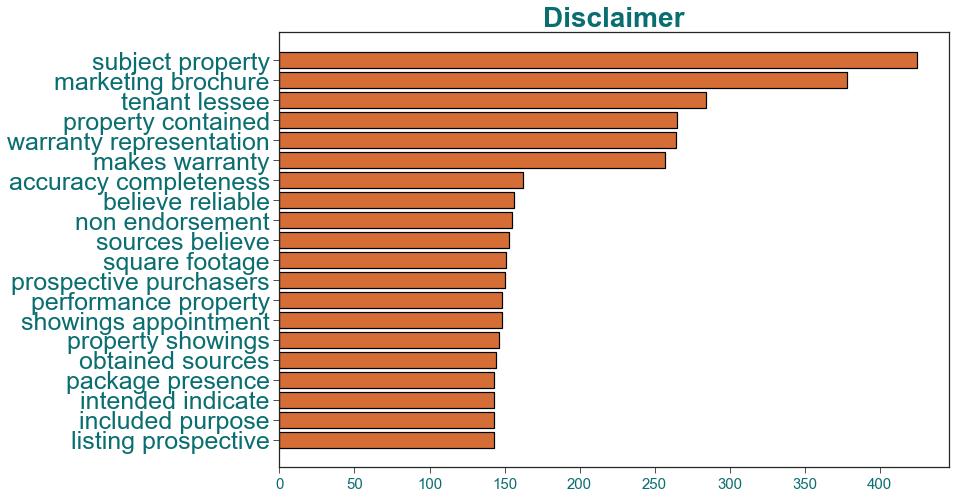

In [53]:
# Extract lists of words and counts for plotting
bow_conf_word, bow_conf_count = wds_cnts(freq=words_freq_conf, count=20)

# Plot a bar chart
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(bow_conf_word, bow_conf_count, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#D56D36')
plt.title("Disclaimer", fontsize=28, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=25, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

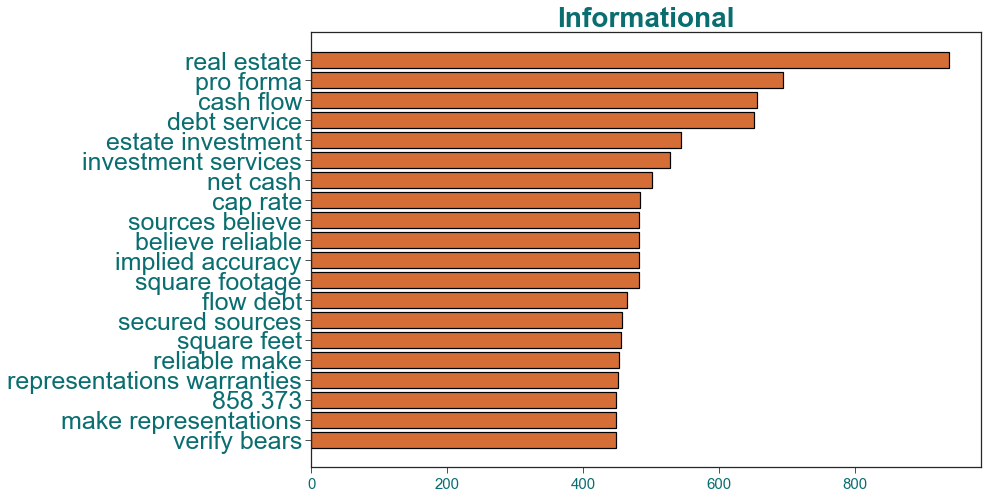

In [54]:
# Extract lists of words and counts for plotting
bow_info_word, bow_info_count = wds_cnts(freq=words_freq_info, count=20)

# Plot a bar chart
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(bow_info_word, bow_info_count, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#D56D36')
plt.title("Informational", fontsize=28, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=20, color='blue')
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

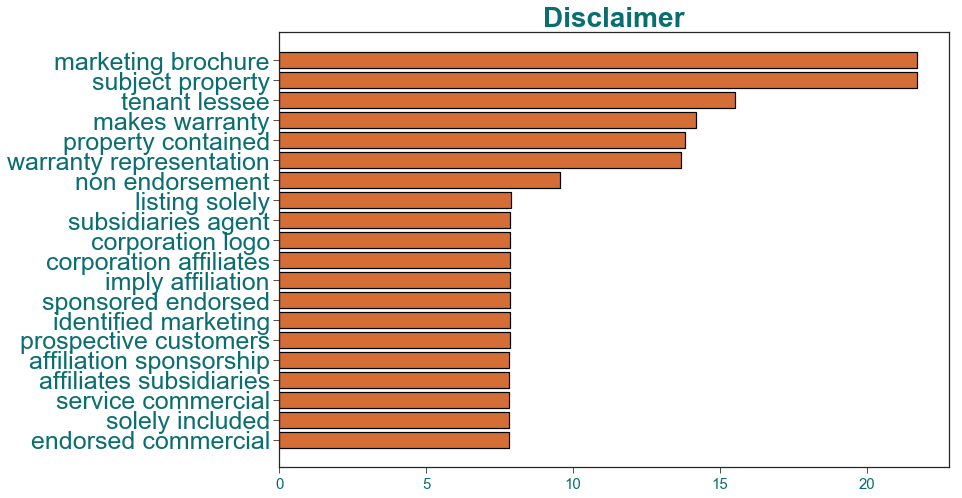

In [58]:
# Extract lists of words and scores for plotting
tfidf_conf_word, tfidf_conf_score = wds_cnts(freq=tfidf_score_conf, count=20)

# Plot a bar chart    
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(tfidf_conf_word, tfidf_conf_score, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#D56D36')
plt.title("Disclaimer", fontsize=28, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=20, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()

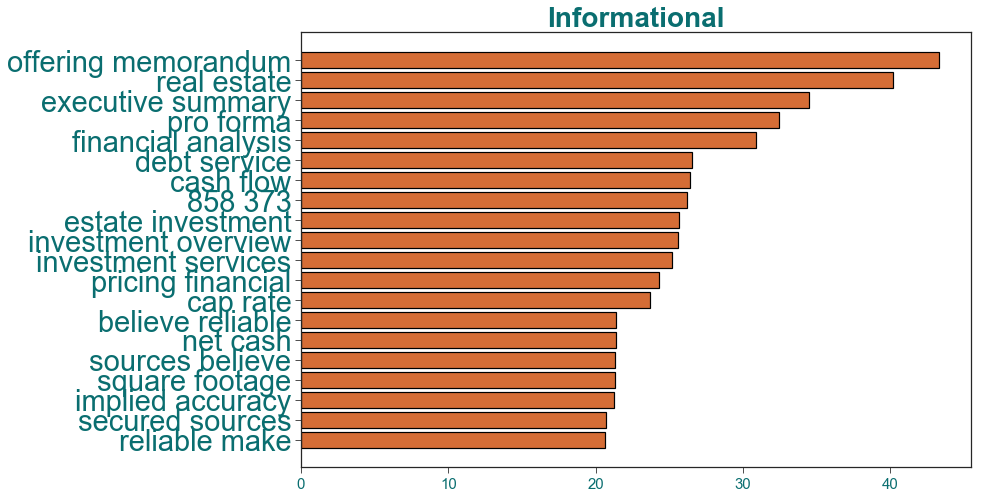

In [57]:
# Extract lists of words and scores for plotting
tfidf_info_word, tfidf_info_score = wds_cnts(freq=tfidf_score_info, count=20)

# Plot a bar chart
fig = plt.figure()
plt.style.use('seaborn-ticks')
plt.barh(tfidf_info_word, tfidf_info_score, orientation = 'horizontal', linewidth=1.2, 
         edgecolor='black', color='#D56D36')
plt.title("Informational", fontsize=28, fontweight='bold', color="#0A6E70")
plt.rc('ytick', labelsize=25, color='blue')
plt.rc('xtick', labelsize=15)
rcParams['figure.figsize'] = 12, 8
plt.tick_params(labelcolor='#0A6E70')
plt.gca().invert_yaxis()
plt.show()